We will start by importing libaries we will need

In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


There are two data frames we are interested in both from a website https://www.tomato.gg/
This website is a gaint online source of world of tank data. Offering both player and vehicle data. 
We will scape data from these webpages and turn them into dataframes.

IMPORTANT!!!
There are two main data tables we are interested in the first is generl information the next deals with the tank economy.
The website is updated on a almost weekly basis. This may cause the get request to fail when it is down for maintaince it could also mean the names or labels of revant columns and data are changed. This can be an issue as variable names could be altered making the code not preform as expected.
In order to address this I decided to scape the page once and write the output to a text file. I used the data from this text file in my project.
The text file is up to date as off April 2023 which will suffice for my primary purpose.
Below I have provided the code I used to scape the webpage. 
This may not always work for the reasons stated above this is fine as project is will work with the text file. 
The code below demonstates the inital scaping process.

In [2]:
url = "https://www.tomato.gg/tank-stats/NA"


response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


script = soup.find("script", {"id": "__NEXT_DATA__"})

if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]
    
    
    #This point data was writen into a text file  
    #Intially generalData now just a temp to demonstrate the process
    #It is an array of Json Objects
    with open("temp.txt", "w", encoding='utf-8') as f:

        for entry in initial_data:
            f.write(str(entry) + "\n")
    
else:
    print("Error data not found")
    


In [3]:
url = "https://www.tomato.gg/economics/all"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

script = soup.find("script", {"id": "__NEXT_DATA__"})
if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]['data']

    with open("temp.txt", "w", encoding='utf-8') as f:

        for entry in initial_data:
            f.write(str(entry) + "\n")
    
else:
    print("Error data not found")

We will now contruct the dataframes with the data from the two older text files

In [4]:
with open('rawDataOutput/generalData.txt', 'r') as f:
    text = f.readlines()
    data = []
    for line in text:
        data.append(eval(line))
    generalDf = pd.DataFrame(data)

generalDf


,tank_id,name,nation,tier,class,image,battles,winrate,damage,sniper_damage,...,potential_damage_received,base_capture_points,base_defense_points,life_time,survival,distance_traveled,wn8,difference,player_winrate,isPrem
0,50193,Skorpion G,Germany,8,TD,https://api.worldoftanks.com/static/2.66.0/wot...,83881,49.07,1263,717,...,882,0.72,0.38,341,30.84,1254,1256,0.01,49.06,True
1,60225,Bourrasque,France,8,MT,https://api.worldoftanks.com/static/2.66.0/wot...,82709,53.56,1423,386,...,1046,0.52,0.53,301,28.18,1835,1725,2.06,51.50,True
2,45057,SU-130PM,USSR,8,TD,https://api.worldoftanks.com/static/2.66.0/wot...,80692,49.66,1390,752,...,779,0.79,0.42,359,34.77,1204,1368,-0.05,49.71,True
3,5505,UDES 15/16,Sweden,10,MT,https://api.worldoftanks.com/static/2.66.0/wot...,79384,49.57,1872,472,...,2129,0.63,0.36,322,29.31,1625,1476,-0.06,49.63,False
4,61505,ELC EVEN 90,France,8,LT,https://api.worldoftanks.com/static/2.66.0/wot...,77746,50.63,590,97,...,761,1.01,0.44,269,23.51,1743,1078,0.33,50.30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,53793,T95E2,USA,8,MT,https://api.worldoftanks.com/static/2.66.0/wot...,118,49.75,882,281,...,1777,1.79,0.19,310,22.03,1432,945,1.23,48.52,True
557,52257,M4A2E4,USA,5,MT,https://api.worldoftanks.com/static/2.66.0/wot...,72,53.87,454,79,...,872,0.10,0.03,238,16.67,1089,1184,0.72,53.15,True
558,51313,Å koda T 45,Czech,7,HT,https://api.worldoftanks.com/static/2.66.0/wot...,71,58.47,1282,164,...,1675,0.92,0.00,305,35.21,1199,1668,0.59,57.88,True
559,54033,Pz. V/IV A,Germany,5,MT,https://api.worldoftanks.com/static/2.66.0/wot...,4,64.00,1014,136,...,865,0.00,0.00,306,75.00,1867,2302,1.28,62.72,True


In [5]:
with open('rawDataOutput/econData.txt', 'r') as f:
    text = f.readlines()
    data = []
    for line in text:
        data.append(eval(line))
    economicDF = pd.DataFrame(data)

economicDF

,tank_id,tier,nation,image,battles,avg_earnings,avg_profit,avg_ammo_cost,cost_per_shot,avg_repair_cost,avg_consumables_cost,earnings_per_minute,profit_per_minute,class,isPrem,name
0,56065,8,USSR,https://api.worldoftanks.com/static/2.71.0/wot...,1974,83062,51376,18613,1968,6600,6472,17053,10548,HT,True,Peregrine
1,43585,8,France,https://api.worldoftanks.com/static/2.66.0/wot...,5234,76287,50983,7969,726,4918,12415,18087,12087,LT,True,EBR 75 FL 10
2,52049,8,UK,https://api.worldoftanks.com/static/2.66.0/wot...,491,104514,50303,34903,3688,6928,12377,19672,9468,HT,True,Charlemagne
3,65329,8,China,https://api.worldoftanks.com/static/2.66.0/wot...,5898,81494,48801,16160,2009,7101,9430,14597,8741,MT,True,122 TM
4,51105,8,Italy,https://api.worldoftanks.com/static/2.66.0/wot...,5184,82093,48613,19811,2107,6145,7523,16522,9784,HT,True,Bisonte C45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,50849,10,Italy,https://api.worldoftanks.com/static/2.66.0/wot...,1039,69889,-32799,60024,4552,21046,21618,12016,-5639,MT,True,Carro 45 t
625,6225,10,UK,https://api.worldoftanks.com/static/2.66.0/wot...,1118,59237,-35643,52861,3769,23469,18551,10554,-6350,HT,True,FV215b
626,17729,10,France,https://api.worldoftanks.com/static/2.66.0/wot...,1008,35275,-36862,42535,3568,18383,11218,6500,-6793,TD,False,Foch B
627,51729,3,Germany,https://api.worldoftanks.com/static/2.66.0/wot...,583,35964,-37169,69282,378,693,3157,7894,-8159,LT,True,Pz. II J


These DF have a lot of data we don't need so we will trim some of the columns we don't need.


In [6]:
print(generalDf.columns)

generalDf = generalDf.drop(columns='image')
generalDf = generalDf.drop(columns='sniper_damage')
generalDf = generalDf.drop(columns='frags')
generalDf = generalDf.drop(columns='tracking_assist')
generalDf = generalDf.drop(columns='shots_fired')
generalDf = generalDf.drop(columns='direct_hits')
generalDf = generalDf.drop(columns='penetrations')
generalDf = generalDf.drop(columns='damage_received_from_invisible')
generalDf = generalDf.drop(columns='potential_damage_received')
generalDf = generalDf.drop(columns='base_capture_points')
generalDf = generalDf.drop(columns='base_defense_points')
generalDf = generalDf.drop(columns='life_time')
generalDf = generalDf.drop(columns='distance_traveled')
generalDf = generalDf.drop(columns='difference')


print(generalDf.columns)


Index(['tank_id', 'name', 'nation', 'tier', 'class', 'image', 'battles',
       'winrate', 'damage', 'sniper_damage', 'frags', 'spotting_assist',
       'tracking_assist', 'shots_fired', 'direct_hits', 'penetrations',
       'hit_rate', 'pen_rate', 'spots', 'damage_blocked', 'damage_received',
       'damage_received_from_invisible', 'potential_damage_received',
       'base_capture_points', 'base_defense_points', 'life_time', 'survival',
       'distance_traveled', 'wn8', 'difference', 'player_winrate', 'isPrem'],
      dtype='object')
Index(['tank_id', 'name', 'nation', 'tier', 'class', 'battles', 'winrate',
       'damage', 'spotting_assist', 'hit_rate', 'pen_rate', 'spots',
       'damage_blocked', 'damage_received', 'survival', 'wn8',
       'player_winrate', 'isPrem'],
      dtype='object')


In [7]:
print(economicDF.columns)

economicDF = economicDF.drop(columns='image')

print(economicDF.columns)


Index(['tank_id', 'tier', 'nation', 'image', 'battles', 'avg_earnings',
       'avg_profit', 'avg_ammo_cost', 'cost_per_shot', 'avg_repair_cost',
       'avg_consumables_cost', 'earnings_per_minute', 'profit_per_minute',
       'class', 'isPrem', 'name'],
      dtype='object')
Index(['tank_id', 'tier', 'nation', 'battles', 'avg_earnings', 'avg_profit',
       'avg_ammo_cost', 'cost_per_shot', 'avg_repair_cost',
       'avg_consumables_cost', 'earnings_per_minute', 'profit_per_minute',
       'class', 'isPrem', 'name'],
      dtype='object')


Lets start by examing the average win rates betweeen premium and non premium tanks

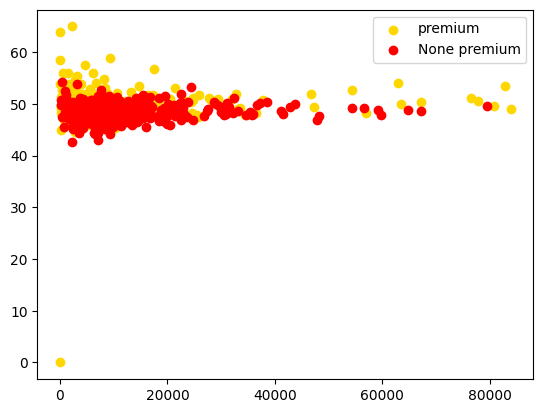

In [8]:
premiumGeneral = generalDf[generalDf['isPrem'] == True]
stdGeneral = generalDf[generalDf['isPrem'] == False]

plt.scatter(premiumGeneral['battles'], premiumGeneral['winrate'], label = "premium", color = 'gold')
plt.scatter(stdGeneral['battles'], stdGeneral['winrate'], label = "None premium", color = 'red')
plt.legend()
plt.show()

Looking at this plot we see that there is an out liner which alters the shape of the graph.
Indeed the number of battles can skew results greatly. For example if a tank is only played in 3 games and wins all 3 games it would have a 100% win rate. This is not quite telling of the tanks overall preformance. As such lets chop off tanks that have less than 1000 games played total.
Lets also increase tranparency to better see the data.

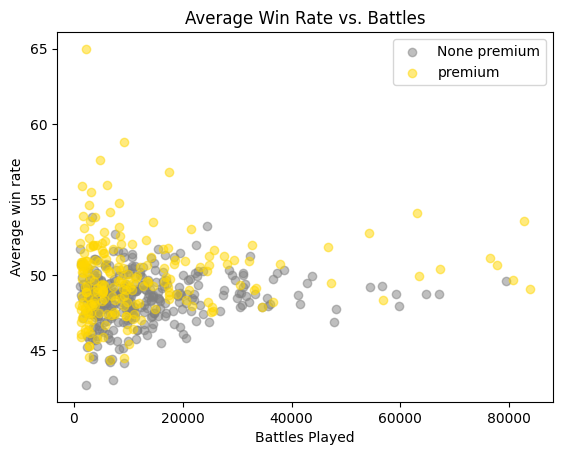

In [15]:
tempDf = generalDf[generalDf['battles'] >= 1000]
premiumGeneral = tempDf[tempDf['isPrem'] == True]
stdGeneral = tempDf[tempDf['isPrem'] == False]


plt.scatter(stdGeneral['battles'], stdGeneral['winrate'], label = "None premium", color = 'gray', alpha=0.5)
plt.scatter(premiumGeneral['battles'], premiumGeneral['winrate'], label = "premium", color = 'gold', alpha=0.5)

plt.title('Average Win Rate vs. Battles')
plt.xlabel('Battles Played')
plt.ylabel('Average win rate')

plt.legend()
plt.show()